In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from kneed import KneeLocator

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
#path dataset
path = "../DataSet/"

In [3]:
df = pd.read_csv(path + 'Dataset_Final.csv') 

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NotValid,TotalSatisfaction,ProbablyLeave
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,20,2.0,2,8.0,7,2,13,False,11,0
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,21,3.0,3,1.0,8,1,6,True,11,1
2,36.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,7,4.0,3,1.0,5,1,2,False,13,0
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,12,1.0,3,3.0,7,0,7,False,9,1
4,37.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,2,3.0,3,10.0,2,2,1,True,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,38.0,No,Travel_Rarely,890,Sales,2,3,Marketing,4,Male,...,2,3.0,3,8.0,2,2,2,True,12,0
1466,44.0,No,Travel_Rarely,1111,Sales,8,2,Life Sciences,3,Male,...,6,5.0,3,4.0,2,1,2,False,9,0
1467,30.0,No,Travel_Rarely,163,Research & Development,24,1,Technical Degree,4,Male,...,9,3.0,2,1.0,4,1,4,False,15,0
1468,36.0,No,Travel_Frequently,457,Research & Development,26,2,Other,2,Male,...,4,3.0,2,8.0,2,1,3,True,9,1


In [5]:
numeric_features = ["Age", "DailyRate", "DistanceFromHome", "Education", "HourlyRate",
                   "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome",
                   "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction",
                   "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance",
                   "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
                   "YearsWithCurrManager", "TotalSatisfaction"]

In [ ]:
features = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"]

In [6]:
def res_K(df, features):
    print("Test effettuato sulle features:")
    print(features)
    scaler = RobustScaler()
    scaled_features = scaler.fit_transform(df[features])
    sse = {}
    silhouette = {}
    for k in range(2, 30):
        kmeans = KMeans( init="random", n_clusters=k, max_iter=1000).fit(scaled_features)
        #L'inertia è la somma delle distanza degli esempio rispetto al centro del cluster più vicino
        sse[k] = kmeans.inertia_
        silhouette[k] = silhouette_score(scaled_features, kmeans.labels_)
        
    plt.figure()
    plt.style.use('seaborn-darkgrid')
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("k")
    plt.ylabel("SSE")
    plt.show()
    kl = KneeLocator(
        range(2, 30), list(sse.values()), curve="convex", direction="decreasing"
    )
    
    print(kl.elbow)
    
    model = KMeans()
    visualizer = KElbowVisualizer(
            model, k=(2,30), metric='silhouette',locate_elbow=True
    )

    visualizer.fit(scaled_features)        # Fit the data to the visualizer
    visualizer.show()
    

    print("***************************************")
    
    return sse, silhouette, kl.elbow
    
    

Test effettuato sulle features:
['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'TotalSatisfaction']


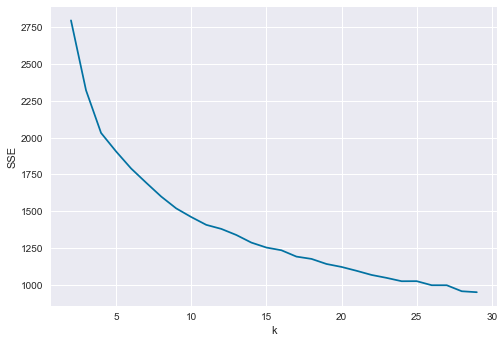

9


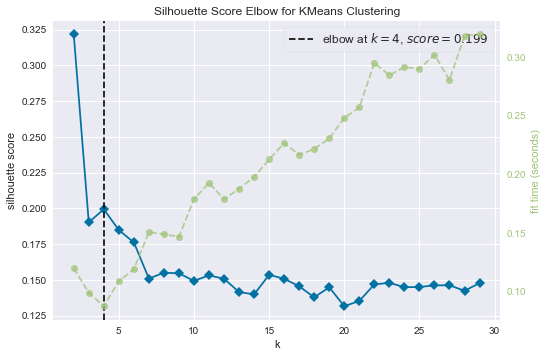

***************************************
k = 2| SSE = 2798.1188532632486| silhouette = 0.32158688849395556
k = 3| SSE = 2322.706198220532| silhouette = 0.1900108556188294
k = 4| SSE = 2032.4439940932082| silhouette = 0.19868185495669785
k = 5| SSE = 1906.4781114420057| silhouette = 0.17744650813636664
k = 6| SSE = 1790.5401705131537| silhouette = 0.14946046967160068
k = 7| SSE = 1693.9383517169335| silhouette = 0.15103208673962443
k = 8| SSE = 1599.7247982870922| silhouette = 0.15622765602350142
k = 9| SSE = 1519.098131239972| silhouette = 0.157711716334408
k = 10| SSE = 1460.3687955277628| silhouette = 0.15576028521027394
k = 11| SSE = 1407.0579590231616| silhouette = 0.15645035809149618
k = 12| SSE = 1379.5456218278146| silhouette = 0.15444189906497396
k = 13| SSE = 1338.1039283226926| silhouette = 0.14582156822125952
k = 14| SSE = 1286.361656710029| silhouette = 0.14258875326771478
9


In [7]:
sse, silhouette, kl = res_K(df[df["NotValid"]==False], ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"])
for i in range(2, 15):
    print("k = " + str(i) + "| SSE = " + str(sse[i]) + "| silhouette = " + str(silhouette[i]))
print(kl)

Test effettuato sulle features:
['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'TotalSatisfaction']


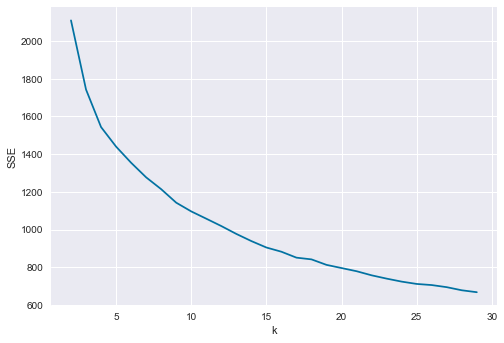

9


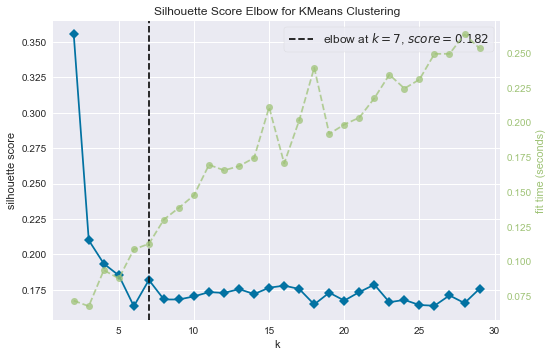

***************************************
k = 2| SSE = 2108.8742509399435| silhouette = 0.35511357803631527
k = 3| SSE = 1742.4538358412751| silhouette = 0.20999060911982081
k = 4| SSE = 1543.455971059383| silhouette = 0.1927537007571745
k = 5| SSE = 1439.8534859473334| silhouette = 0.1826503630215696
k = 6| SSE = 1354.3083563216971| silhouette = 0.18092302568786184
k = 7| SSE = 1276.9417795984743| silhouette = 0.1682142481779411
k = 8| SSE = 1214.2770930044558| silhouette = 0.1679195865791929
k = 9| SSE = 1142.7515792193446| silhouette = 0.1695108816657135
k = 10| SSE = 1096.4358287265923| silhouette = 0.17083139036765915
k = 11| SSE = 1057.8101847389103| silhouette = 0.16311822450200866
k = 12| SSE = 1018.808693440286| silhouette = 0.16308139879823824
k = 13| SSE = 977.1025760906623| silhouette = 0.1616096163868447
k = 14| SSE = 939.1345961450356| silhouette = 0.17145672590718228
9


In [8]:
sse, silhouette, kl = res_K(df[df["NotValid"]==True], ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"])
for i in range(2, 15):
    print("k = " + str(i) + "| SSE = " + str(sse[i]) + "| silhouette = " + str(silhouette[i]))
print(kl)

Test effettuato sulle features:
['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'TotalSatisfaction']


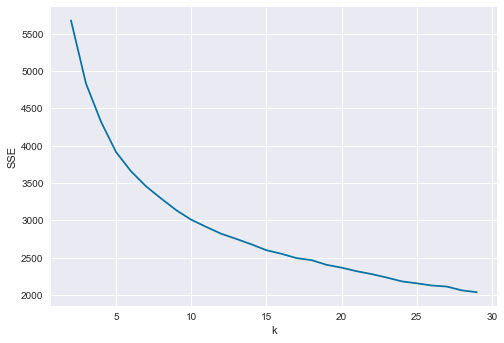

9


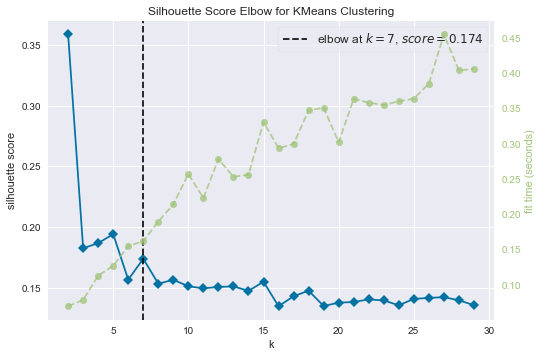

***************************************
k = 2| SSE = 5678.9730776589595| silhouette = 0.3562275324044492
k = 3| SSE = 4832.206901843317| silhouette = 0.1825659699341216
k = 4| SSE = 4321.27380940388| silhouette = 0.186955067438313
k = 5| SSE = 3915.1798274970624| silhouette = 0.19430349114117618
k = 6| SSE = 3657.416056396213| silhouette = 0.15768254136771467
k = 7| SSE = 3456.056282696917| silhouette = 0.14922280545123345
k = 8| SSE = 3293.916583338736| silhouette = 0.1536758222889227
k = 9| SSE = 3138.0958674254766| silhouette = 0.15743435156483723
k = 10| SSE = 3010.2889746245573| silhouette = 0.1505118207219807
k = 11| SSE = 2913.651346438629| silhouette = 0.15287052320525354
k = 12| SSE = 2821.8374945717624| silhouette = 0.1520237728995387
k = 13| SSE = 2752.7679858665088| silhouette = 0.15094786419907125
k = 14| SSE = 2680.6532115064288| silhouette = 0.13817926677023143
9


In [17]:
sse, silhouette, kl = res_K(df, ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"])
for i in range(2, 15):
    print("k = " + str(i) + "| SSE = " + str(sse[i]) + "| silhouette = " + str(silhouette[i]))
print(kl)

In [54]:
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df[features])
kmeans = KMeans(n_clusters=8, max_iter=1000).fit(scaled_features)

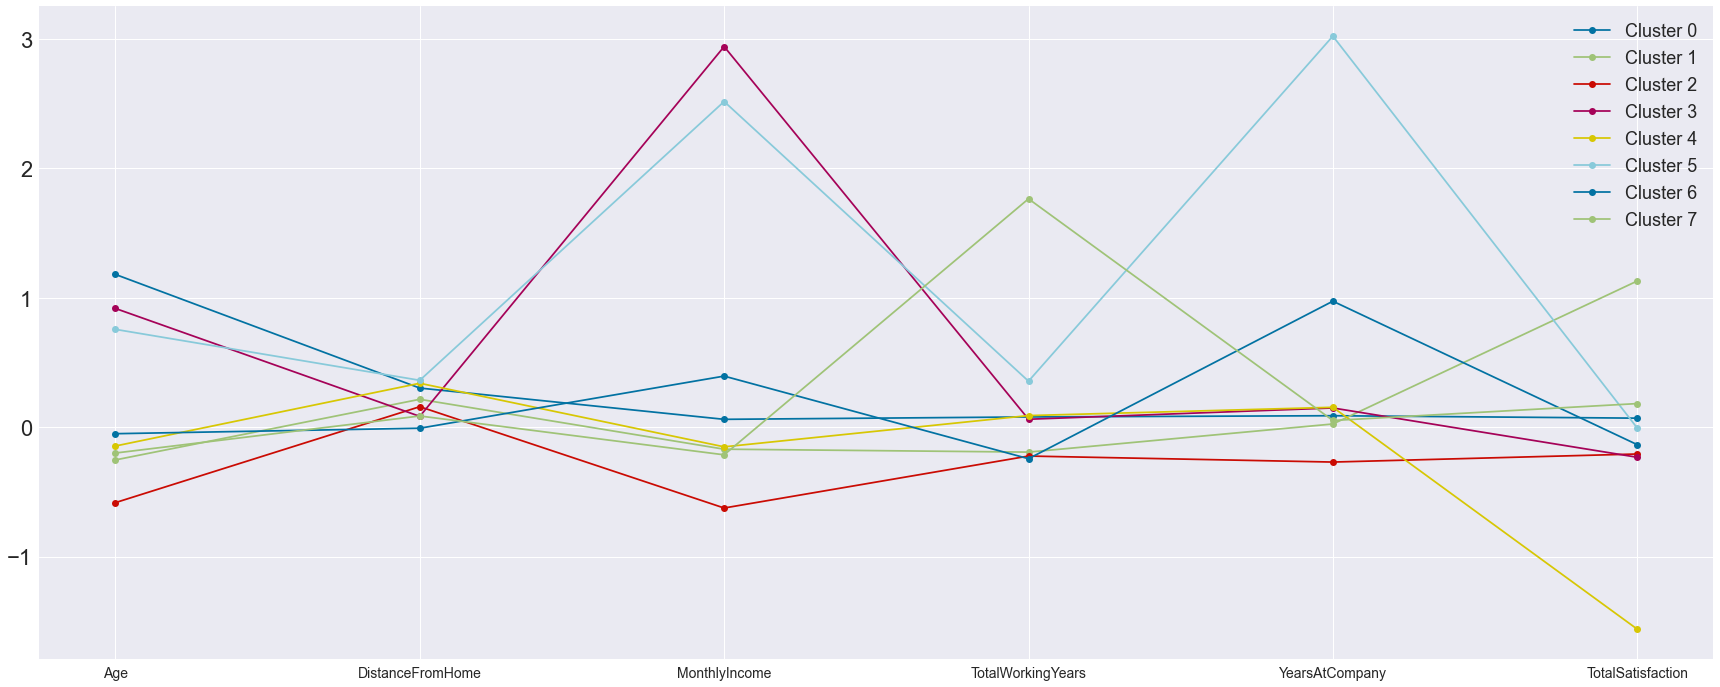

In [55]:
plt.figure(figsize=(30, 12))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(features)), features, fontsize=14)
plt.legend(fontsize=18)
plt.show()

In [56]:
features = ["Age", "DistanceFromHome", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "TotalSatisfaction"]

In [74]:
x = df[features].copy()

x["clusters"] = kmeans.labels_

In [58]:
fig = go.Figure(data=
                go.Parcoords(
                    dimensions = list([
                        dict(
                            label = "Age", values = x["Age"]),
                        dict(
                            label = 'DistanceFromHome', values = x['DistanceFromHome']),
                        dict(
                            label = 'MonthlyIncome', values = x["MonthlyIncome"]),
                        dict(
                            label = 'TotalWorkingYears', values = x["TotalWorkingYears"]),
                        dict(
                            label = 'YearsAtCompany', values = x["YearsAtCompany"]),
                        dict(
                            label = 'TotalSatisfaction', values = x["TotalSatisfaction"]),
                        dict(
                            label = 'Clusters', values = x["clusters"])
                    ])
                )
        )
fig.show()

In [63]:
x["ChildWorking"] = [1 if ( ( (c[0] - c[3]) < 18) & ((c[0] - c[3]) > 0)) else 0 for c in x.values]

In [64]:
x["PreviusBirthWorking"] = [1 if ( (c[0] - c[3]) <= 0 ) else 0 for c in x.values]

In [65]:
x["IllegalWorking"] = [1 if ((c[4] > c[3]) & (c[7]==0))  else 0 for c in x.values]

In [66]:
fig = go.Figure(data=
                go.Parcoords(
                    dimensions = list([
                        dict(
                            label = "IllegalWorking", values = x["IllegalWorking"]),
                        dict(
                            label = 'ChildWorking', values = x['ChildWorking']),
                        dict(
                            label = 'PreviusBirthWorking', values = x["PreviusBirthWorking"]),
                        dict(
                            label = 'Clusters', values = x["clusters"])
                    ])
                )
        )
fig.show()

#### 3D Plot

In [75]:
df_copy = x.copy()

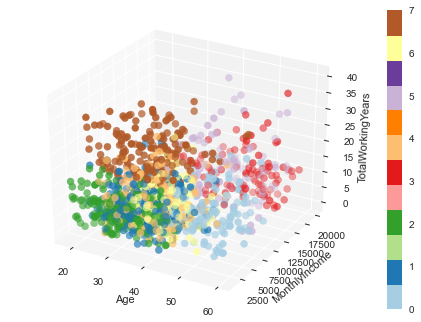

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', facecolor='white')
x = df_copy['Age']
y = df_copy['MonthlyIncome']
z = df_copy['TotalWorkingYears']

p = ax.scatter(x,y,z, marker="o", c=df_copy["clusters"], s=50, cmap="Paired")
fig.colorbar(p)
ax.set_xlabel('Age')
ax.set_ylabel('MonthlyIncome')
ax.set_zlabel('TotalWorkingYears')
plt.show()